1.

In [5]:
import numpy as np
import pandas as pd
# remove duplicate in a numpy array
my_array = np.array([1, 2, 2, 4, 5])
np.unique(my_array)

array([1, 2, 4, 5])

In [11]:
#remove duplicate in a dataframework
b = pd.DataFrame([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])
b.drop_duplicates()

,0,1,2,3,4
0,1,2,3,4,5
2,1,2,3,4,6


2.

SELECT round(100*count(if b.acceptor_id is null then 0 else 1) / count(a.requestor_id) ,2) AS acceptance_rate
FROM Friend_Request a
LEFT JOIN Request_Accepted b 
  ON b.acceptor_id = a.sent_to_id 
  AND a.requester_id = b.requester_id

In [0]:
result=pd.merge(friend_request, request_accepted,how='left', left_on=['sent_to_id','requester_id']), right_on=["requester_id","acceptor_id"]
result["acceptance_rate"]=np.count_nonzero(~np.isnan(result['acceptor_id']))/len(result['requester_id']*1.0)

3.

In [3]:
mylist=["4175004175004172","4917491749174917","346416800707698","376416800707698","37641680070769832112","36641680070769","54545641680070769"]
def CCIdentify(str):
  if (str[0]=='4'and len(str)==16):
    if (str[0:4] in ['4026', '4405', '4508', '4844','4913', '4917'] or str[0:5]=='417500'):
      print ('this card is issued by "VISAELECTRON"')
    else:
      print('this card is issued by VISA')
  elif (str[:2] in ['34','37'] and len(str)==15):
    print ('this card is issued by AMEX')
  elif (str[0:2]=='36'and len(str)==14):
    print ("this card is issued by Diner's Club")
  else:
    print ("try again")
    return;
for cc in mylist:
   CCIdentify(cc)           

this card is issued by VISA
this card is issued by "VISAELECTRON"
this card is issued by AMEX
this card is issued by AMEX
try again
this card is issued by Diner's Club
try again


4.

In [0]:
import datetime

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BA501_python_data.csv to BA501_python_data.csv
User uploaded file "BA501_python_data.csv" with length 6058269 bytes


In [9]:
import io

my_data = pd.read_csv(io.StringIO(uploaded['BA501_python_data.csv'].decode('utf-8')))
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [10]:
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [0]:
import matplotlib.pyplot as plt
# plot the time series
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    # change legend        
    ax.legend()
    # format date
    plt.gcf().autofmt_xdate()
            
def GetCumSeries(my_id,country,my_data):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum() 
    cumseries = np.cumsum(series)
    revenue = cumseries[-1]
    return((cumseries, revenue))        
    
def PrintCumulativeTimeSeries(experiment_ids, country,my_data):
    experiment_series=GetCumSeries(experiment_ids[0],country,my_data)[0]
    control_series=GetCumSeries(experiment_ids[1],country,my_data)[0]
    PlotSeries(experiment_series,control_series)
    revenue_experiment=GetCumSeries(experiment_ids[0],country,my_data)[1]
    revenue_control=GetCumSeries(experiment_ids[1],country,my_data)[1]
    revenue_uplift=100.0*(revenue_experiment-revenue_control)/revenue_control
    return("The revenue uplift is "+ str(revenue_uplift)+' %')
   
   
    

'The revenue uplift is -4.465808189455078 %'

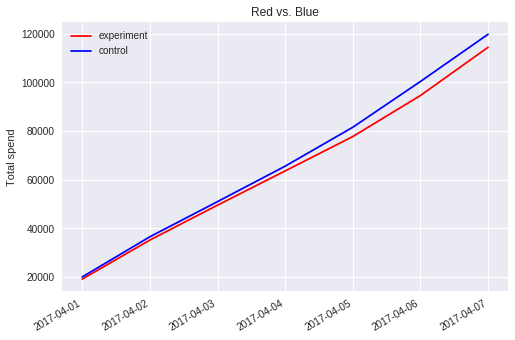

In [52]:
PrintCumulativeTimeSeries([12624548,12624549], "US",my_data)